# 1. Import and Install Dependencies

In [41]:
!pip install tensorflow opencv-python mediapipe sklearn matplotlib

In [42]:
import cv2
import numpy as np
import os as os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [43]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [44]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [45]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [46]:
def draw_styled_landmarks(image, results):
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [95]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('SignSense', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [96]:
len(results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [49]:
results

mediapipe.python.solution_base.SolutionOutputs

In [50]:
draw_landmarks(frame, results)

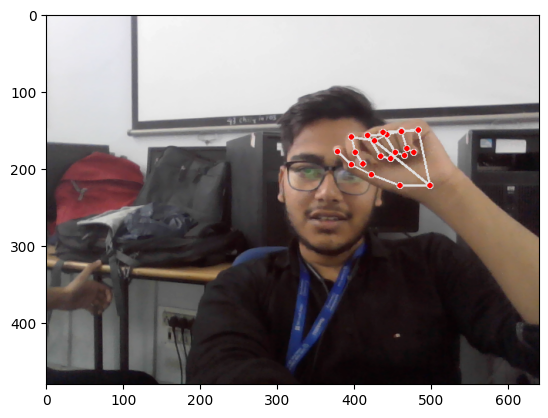

In [51]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [52]:
len(results.left_hand_landmarks.landmark)

21

In [53]:
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [54]:
def extract_keypoints(results):
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([lh, rh])

In [55]:
result_test = extract_keypoints(results)

In [56]:
result_test

array([ 7.79130578e-01,  4.63713080e-01, -5.44415059e-07,  7.17892647e-01,
        4.62657988e-01, -7.68448180e-03,  6.60257578e-01,  4.34446871e-01,
       -1.55132981e-02,  6.19907618e-01,  4.07280087e-01, -2.70128101e-02,
        5.92131495e-01,  3.71515572e-01, -3.54060046e-02,  6.65953398e-01,
        3.43139946e-01,  6.12720801e-03,  6.20295048e-01,  3.31814200e-01,
       -2.14154143e-02,  6.26961350e-01,  3.74409050e-01, -3.53203043e-02,
        6.42885864e-01,  4.04269338e-01, -4.00368795e-02,  6.90924227e-01,
        3.25516045e-01, -1.39288895e-03,  6.51733994e-01,  3.27208877e-01,
       -2.63784416e-02,  6.79237068e-01,  3.83587837e-01, -2.76167933e-02,
        6.99603260e-01,  3.90613765e-01, -2.22223625e-02,  7.21352160e-01,
        3.14757049e-01, -1.38232280e-02,  6.83484316e-01,  3.18851739e-01,
       -3.94961350e-02,  7.08606601e-01,  3.74711275e-01, -2.64684241e-02,
        7.28016257e-01,  3.81608337e-01, -1.12505592e-02,  7.55315065e-01,
        3.12593818e-01, -

In [57]:
#468*3+33*4+
21*3+21*3

126

In [58]:
np.save('0', result_test)

In [59]:
np.load('0.npy')

array([ 7.79130578e-01,  4.63713080e-01, -5.44415059e-07,  7.17892647e-01,
        4.62657988e-01, -7.68448180e-03,  6.60257578e-01,  4.34446871e-01,
       -1.55132981e-02,  6.19907618e-01,  4.07280087e-01, -2.70128101e-02,
        5.92131495e-01,  3.71515572e-01, -3.54060046e-02,  6.65953398e-01,
        3.43139946e-01,  6.12720801e-03,  6.20295048e-01,  3.31814200e-01,
       -2.14154143e-02,  6.26961350e-01,  3.74409050e-01, -3.53203043e-02,
        6.42885864e-01,  4.04269338e-01, -4.00368795e-02,  6.90924227e-01,
        3.25516045e-01, -1.39288895e-03,  6.51733994e-01,  3.27208877e-01,
       -2.63784416e-02,  6.79237068e-01,  3.83587837e-01, -2.76167933e-02,
        6.99603260e-01,  3.90613765e-01, -2.22223625e-02,  7.21352160e-01,
        3.14757049e-01, -1.38232280e-02,  6.83484316e-01,  3.18851739e-01,
       -3.94961350e-02,  7.08606601e-01,  3.74711275e-01, -2.64684241e-02,
        7.28016257e-01,  3.81608337e-01, -1.12505592e-02,  7.55315065e-01,
        3.12593818e-01, -

# 4. Setup Folders for Collection

In [60]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['yes', 'no', 'hello', 'Help', 'I Love You', 'Nice To Meet You', 'thanks'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [61]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [62]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [21]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('SignSense', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('SignSense', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [22]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [63]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [64]:
label_map = {label:num for num, label in enumerate(actions)}

In [65]:
label_map

{'yes': 0,
 'no': 1,
 'hello': 2,
 'Help': 3,
 'I Love You': 4,
 'Nice To Meet You': 5,
 'thanks': 6}

In [66]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [67]:
np.array(sequences).shape

(210, 30, 126)

In [68]:
np.array(labels).shape

(210,)

In [69]:
X = np.array(sequences)

In [70]:
X.shape

(210, 30, 126)

In [71]:
y = to_categorical(labels).astype(int)

In [72]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [74]:
y_test.shape

(11, 7)

# 7. Build and Train LSTM Neural Network

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [76]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [77]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,126)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [78]:
res = [.7, 0.2, 0.1]

In [79]:
actions[np.argmax(res)]

'yes'

In [80]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [81]:
model.fit(X_train, y_train, epochs=250, callbacks=[tb_callback])

Epoch 1/250
7/7 [==============================] - 9s 74ms/step - loss: 1.9303 - categorical_accuracy: 0.2814
Epoch 2/250
7/7 [==============================] - 1s 91ms/step - loss: 1.6807 - categorical_accuracy: 0.3015
Epoch 3/250
7/7 [==============================] - 1s 94ms/step - loss: 2.0756 - categorical_accuracy: 0.4573
Epoch 4/250
7/7 [==============================] - 1s 97ms/step - loss: 1.5358 - categorical_accuracy: 0.4372
Epoch 5/250
7/7 [==============================] - 1s 74ms/step - loss: 1.6178 - categorical_accuracy: 0.3618
Epoch 6/250
7/7 [==============================] - 1s 95ms/step - loss: 1.4356 - categorical_accuracy: 0.3518
Epoch 7/250
7/7 [==============================] - 1s 99ms/step - loss: 1.3020 - categorical_accuracy: 0.4673
Epoch 8/250
7/7 [==============================] - 1s 94ms/step - loss: 1.2181 - categorical_accuracy: 0.5427
Epoch 9/250
7/7 [==============================] - 1s 97ms/step - loss: 0.9711 - categorical_accuracy: 0.5075
Epoch 10/2

In [82]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            48896     
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 7)                 231       
                                                                 
Total params: 203591 (795.28 KB)
Trainable params: 20359

# 8. Make Predictions

In [83]:
res = model.predict(X_test)

1/1 [==============================] - 1s 704ms/step


In [84]:
actions[np.argmax(res[4])]

'I Love You'

In [85]:
actions[np.argmax(y_test[4])]

'I Love You'

# 9. Save Weights

In [86]:
model.save('action.h5')

C:\Users\shrey\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [87]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [88]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [89]:
yhat = model.predict(X_train)

7/7 [==============================] - 1s 72ms/step


In [90]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [91]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[171,   0],
        [  0,  28]],

       [[169,   0],
        [  0,  30]],

       [[169,   0],
        [  0,  30]],

       [[171,   0],
        [  0,  28]],

       [[173,   0],
        [  0,  26]],

       [[171,   0],
        [  0,  28]],

       [[170,   0],
        [  0,  29]]], dtype=int64)

In [92]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [93]:
colors = [(245,117,16), (245,117,16), (245,117,16), (245,117,16), (245,117,16), (245,117,16), (245,117,16)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [54]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1800x1800 with 0 Axes>

In [ ]:
sequence.reverse()

In [ ]:
len(sequence)

In [ ]:
sequence.append('def')

In [55]:
sequence.reverse()

AttributeError: 'int' object has no attribute 'reverse'

In [56]:
sequence[-30:]

TypeError: 'int' object is not subscriptable

In [139]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('SignSense', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [140]:
cap.release()
cv2.destroyAllWindows()

In [134]:
res[np.argmax(res)] > threshold

True

In [108]:
(num_sequences,30,1662)

NameError: name 'num_sequences' is not defined

In [ ]:
model.predict(np.expand_dims(X_test[0], axis=0))